Os modelos de previsão serão trabalhados com dados de PLD horário de 01/01/2019 atá 01/01/2020, mas é aberta a utilização de outros tipos e formatos de dados.

## Importação de Bibliotecas

In [2]:
# Manipulação dos Dados
import numpy as np
import pandas as pd
# Modelagem
from statsmodels.tsa.api import Holt
# Visualização de Dados
import matplotlib.pyplot as plt

## Importação dos Dados

In [3]:
# Carregamento do dataset de PLD
data = pd.read_excel("dados_pld.xlsx", index_col="data").dropna()
data = data["2019-01-01 00:00:00":"2020-01-01 00:00:00"]
data.head()

,PLD
data,
2019-01-01 00:00:00,42.35
2019-01-01 01:00:00,42.35
2019-01-01 02:00:00,42.35
2019-01-01 03:00:00,42.35
2019-01-01 04:00:00,42.35


## Sem Otimização

In [4]:
# smoothing_trend (beta) 80% de influência na tendência mais atual
fit1 = Holt(data).fit(smoothing_level=0.2, smoothing_trend=0.8, optimized=False)
num_prev = 168
fcast1 = fit1.forecast(num_prev)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


In [5]:
forecast_index = pd.date_range(data.index.max(), periods=num_prev, freq="H")
fcast1 = pd.DataFrame(fcast1.values, index = forecast_index, columns=["pld_prev"])
fcast1.head()

,pld_prev
2020-01-01 00:00:00,289.212084
2020-01-01 01:00:00,287.209440
2020-01-01 02:00:00,285.206796
2020-01-01 03:00:00,283.204152
2020-01-01 04:00:00,281.201508


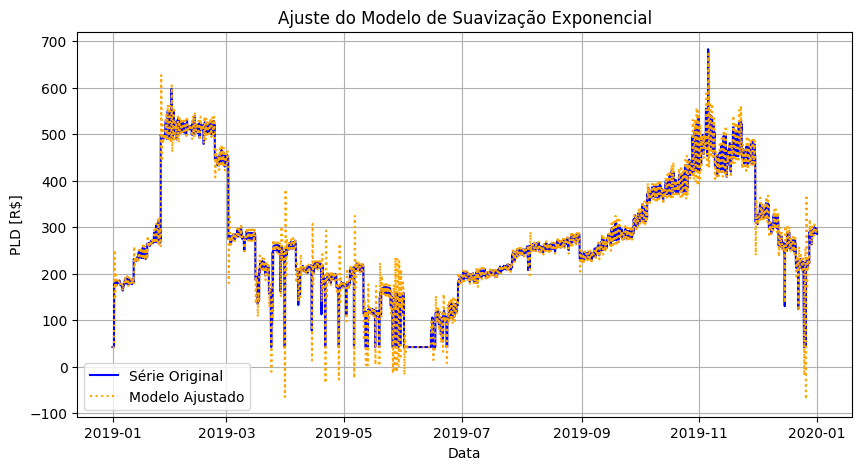

In [6]:
plt.figure(figsize=(10, 5))
plt.plot(data, label="Série Original", color="blue")
plt.plot(fit1.fittedvalues, label="Modelo Ajustado", linestyle='dotted', color="orange")
plt.title("Ajuste do Modelo de Suavização Exponencial")
plt.xlabel("Data")
plt.ylabel("PLD [R$]")
plt.grid()
plt.legend()

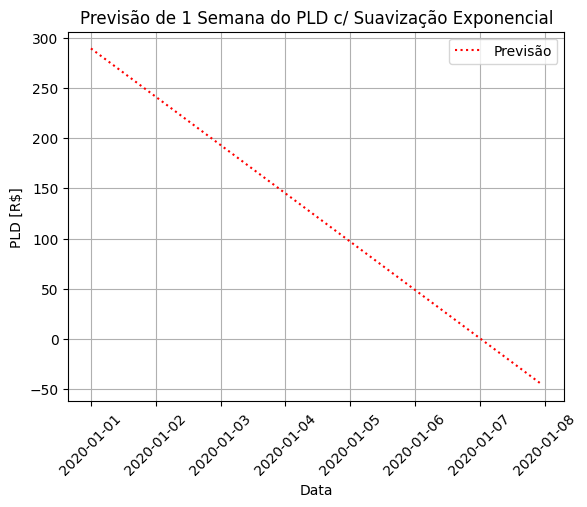

In [7]:
plt.plot(fcast1, label="Previsão", linestyle='dotted', color="red")
plt.title("Previsão de 1 Semana do PLD c/ Suavização Exponencial")
plt.xlabel("Data")
plt.xticks(rotation=45)
plt.ylabel("PLD [R$]")
plt.grid()
plt.legend()

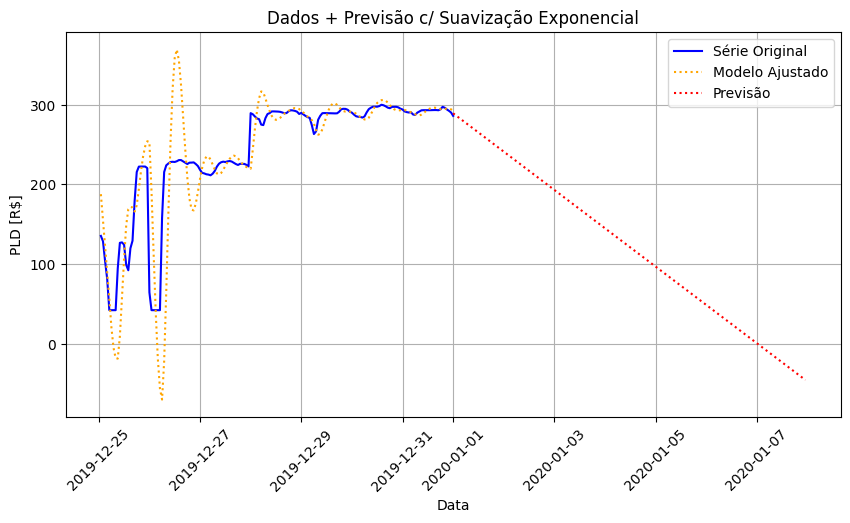

In [8]:
plt.figure(figsize=(10, 5))
plt.plot(data.iloc[-168:], label="Série Original", color="blue")
plt.plot(fit1.fittedvalues.iloc[-168:], label="Modelo Ajustado", linestyle='dotted', color="orange")
plt.plot(fcast1.iloc[-168:], label="Previsão", linestyle='dotted', color="red")
plt.title("Dados + Previsão c/ Suavização Exponencial")
plt.xlabel("Data")
plt.xticks(rotation=45)
plt.ylabel("PLD [R$]")
plt.grid()
plt.legend()

## Com Oitmização

In [9]:
# suavização da tendência phi
fit3 = Holt(data, damped_trend=True).fit(smoothing_level=0.8, smoothing_trend=0.2)
fcast3 = fit3.forecast(num_prev)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


In [10]:
#forecast_index = pd.date_range(data.index.max(), periods=num_previsoes, freq="H")
fcast3 = pd.DataFrame(fcast3.values, index = forecast_index, columns=["pld_prev"])
fcast3.head()

,pld_prev
2020-01-01 00:00:00,285.527679
2020-01-01 01:00:00,284.230082
2020-01-01 02:00:00,282.945462
2020-01-01 03:00:00,281.673688
2020-01-01 04:00:00,280.414631


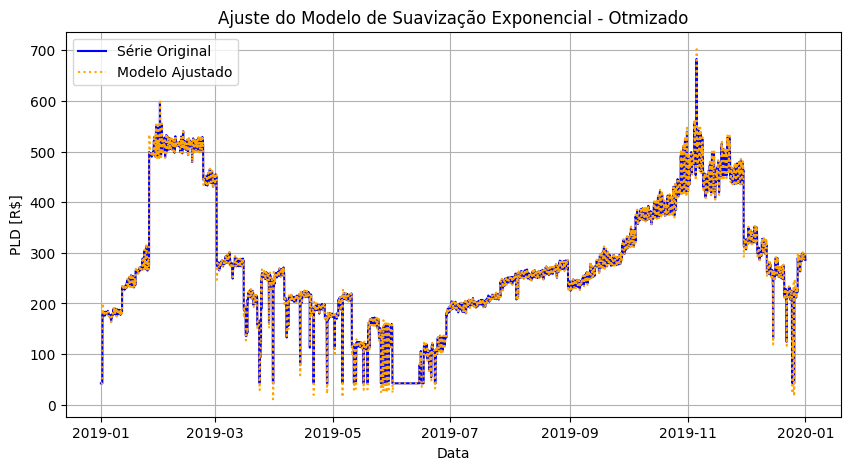

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(data, label="Série Original", color="blue")
plt.plot(fit3.fittedvalues, label="Modelo Ajustado", linestyle='dotted', color="orange")
plt.title("Ajuste do Modelo de Suavização Exponencial - Otmizado")
plt.xlabel("Data")
plt.ylabel("PLD [R$]")
plt.grid()
plt.legend()

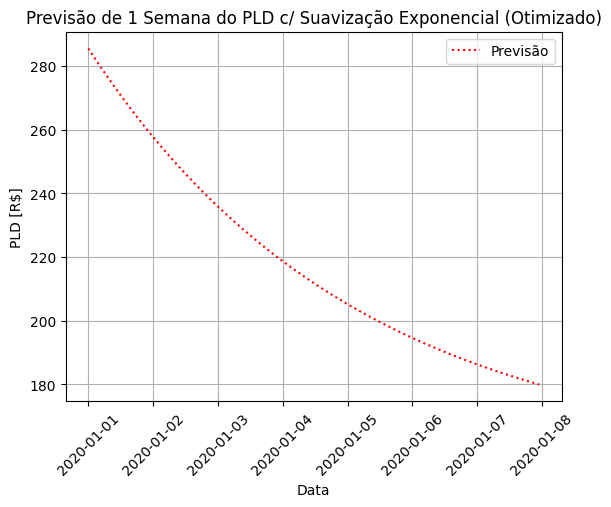

In [12]:
plt.plot(fcast3, label="Previsão",linestyle='dotted', color="red")
plt.title("Previsão de 1 Semana do PLD c/ Suavização Exponencial (Otimizado)")
plt.xlabel("Data")
plt.xticks(rotation=45)
plt.ylabel("PLD [R$]")
plt.grid()
plt.legend()

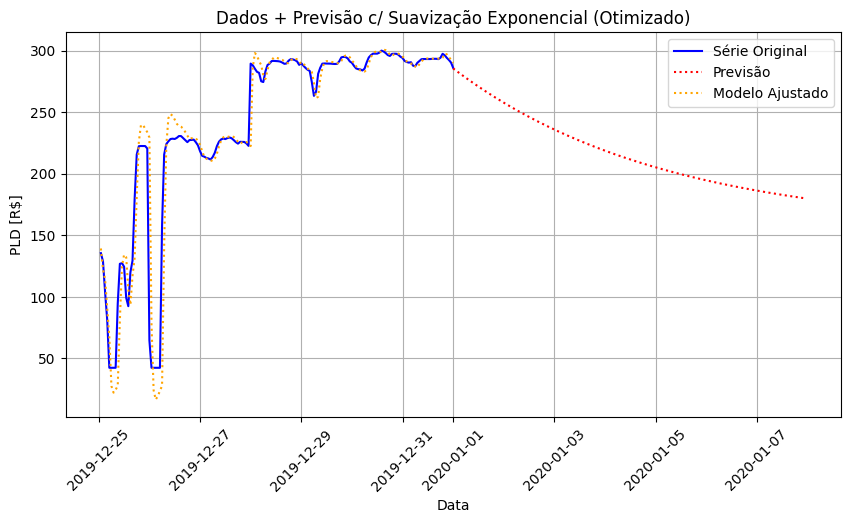

In [13]:
plt.figure(figsize=(10, 5))
plt.plot(data.iloc[-168:], label="Série Original", color="blue")
plt.plot(fcast3.iloc[-168:], label="Previsão", linestyle='dotted', color="red")
plt.plot(fit3.fittedvalues.iloc[-168:], label="Modelo Ajustado", linestyle='dotted', color="orange")
plt.title("Dados + Previsão c/ Suavização Exponencial (Otimizado)")
plt.xlabel("Data")
plt.xticks(rotation=45)
plt.ylabel("PLD [R$]")
plt.grid()
plt.legend()